In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path = 'ex1data1.txt'
data = pd.read_csv(path, header = None, names = ['Population', 'Profit'])# 加载数据
data.head()# 默认只列出前5行数据，可以输入参数设定列出的数据量

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2]:
data.describe()# 返回数值的统计量

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


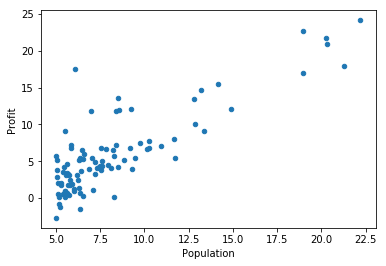

In [3]:
data.plot(kind = 'scatter', x = 'Population', y = 'Profit')# scatter散点图
plt.show()

In [4]:
data.insert(0, 'ones', 1)# 添加一列的原因：h(x) = Θ0 + Θ1*X1 转换为h(x) = Θ0*X0 + Θ1*X1 其中X0=1,因此可以简写为h(x)=Θ^T * X
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [26]:
cols = data.shape[1]# shape方法，返回数据集的形状 (97, 3), shape[1]就是3
X = data.iloc[:, 0:cols-1]# iloc方法，前面的:处取行的范围，后面的:取列的范围
y = data.iloc[:, cols-1:3]

In [34]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix([0,0])

In [120]:
print(X.shape)#注意：X(0)应该是[1, 6.1101], X(1) = [1, 5.5277]
print(y.shape)
print(theta.shape)

(97, 2)
(97, 1)
(1, 2)


In [36]:
theta.T #转置矩阵
theta.flatten()#将矩阵转为一维矩阵 （扁平化）

matrix([[0, 0]])

In [41]:
def computeCost(X, y, theta):
    return np.sum(np.power(X * theta.T - y, 2)) / (2 * X.shape[0])

In [42]:
computeCost(X, y, theta)

32.072733877455676

In [121]:
def GradientDescend(X, y, theta, alpha, num):
    temp = np.matrix([0, 0])
    cost = np.zeros(num)
    for i in range(num):
        temp = theta - alpha/X.shape[0] * (X * theta.T - y).T * X #这里没有写sum，实际上最后一步*X的矩阵运算自带求和
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [122]:
final_theta, cost = GradientDescend(X, y, theta, 0.01, 1000)

In [123]:
computeCost(X, y, final_theta)

4.515955503078912

In [124]:
a = final_theta[0, 1]
b = final_theta[0, 0]
x = np.linspace(data.Population.min(), data.Population.max(), 100)
fx = a * x + b

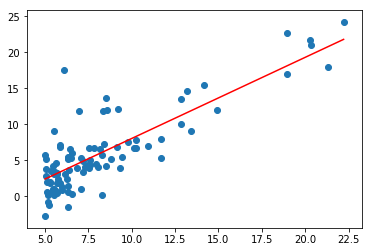

In [125]:
fig, ax = plt.subplots()# fig代表绘图窗口(Figure)；ax代表这个绘图窗口上的坐标系(axis)
ax.plot(x, fx, 'red')
ax.scatter(data.Population, data.Profit)
plt.show()

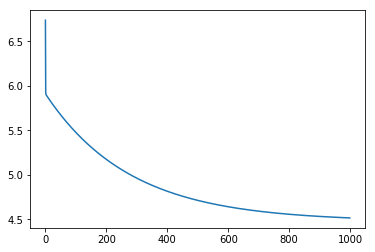

In [126]:
fig, ax = plt.subplots()
ax.plot(np.arange(1000), cost)
plt.show()

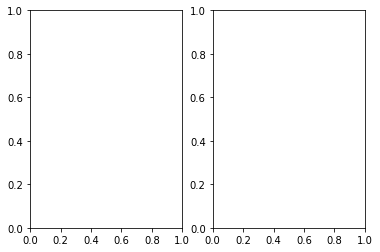

In [114]:
fig, ax = plt.subplots(1,2)
plt.show()